<a href="https://colab.research.google.com/github/Abdelrhman-hamdy11/OCR/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST --> Modified National Institute of Standards and Technology**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [ ]:
#Load the data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.shape

(32696, 785)

In [ ]:
y_train = train['label']
# Drop 'label ' column

X_train = train.drop(labels = ["label"], axis = 1)

y_train.value_counts().sort_index(ascending=True)

,count
label,
0,3192
1,3626
2,3278
3,3373
4,3195
5,2967
6,3216
7,3415
8,3172


In [ ]:
X_train.isnull().any().describe()

,0
count,784
unique,2
top,True
freq,617


In [ ]:
X_train = X_train.apply(lambda x: x.fillna(x.mode()[0]) if x.mode().size > 0 else x)

In [ ]:
X_train.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784




*   count: Total number of columns

*   unique: Number of unique values in the boolean Series (True or False).
*   top: The most frequent value (True or False).


*   freq: The frequency of the most frequent value (e.g., 784 columns with no missing values if top is False).



In [ ]:
#Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , grayscale = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = to_categorical(y_train, num_classes = 10)

In [ ]:
random_seed = 2

In [ ]:
X_train , X_val , y_train ,y_val = train_test_split(X_train , y_train , test_size = 0.1 , random_state = random_seed)

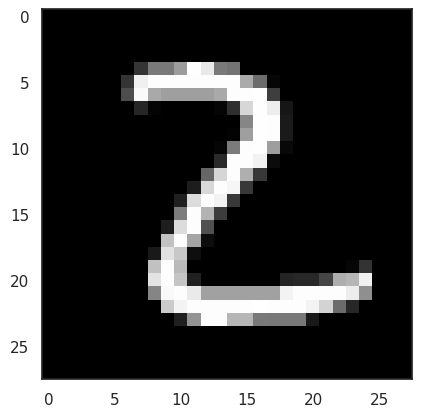

In [ ]:
plt.imshow(X_train[0][:,:,0],cmap = 'gray')


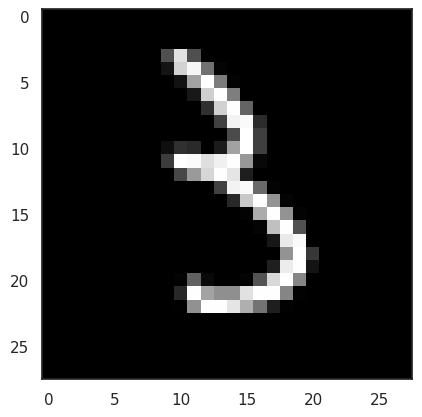

In [ ]:
plt.imshow(X_train[10][:,:,0],cmap = 'gray')

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(5,5),padding = 'Same',activation ='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [ ]:
# early stopping
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
epochs = 15 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [ ]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
# Fit the model
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


342/342 - 214s - 625ms/step - accuracy: 0.9505 - loss: 0.1613 - val_accuracy: 0.9911 - val_loss: 0.0342 - learning_rate: 0.0010
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


342/342 - 11s - 31ms/step - accuracy: 0.9884 - loss: 0.0526 - val_accuracy: 0.9872 - val_loss: 0.0433 - learning_rate: 0.0010
Epoch 3/15
342/342 - 216s - 632ms/step - accuracy: 0.9667 - loss: 0.1145 - val_accuracy: 0.9878 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 4/15
342/342 - 11s - 31ms/step - accuracy: 0.9651 - loss: 0.1720 - val_accuracy: 0.9838 - val_loss: 0.0433 - learning_rate: 0.0010
Epoch 5/15
342/342 - 216s - 631ms/step - accuracy: 0.9718 - loss: 0.0965 - val_accuracy: 0.9896 - val_loss: 0.0356 - learning_rate: 0.0010
Epoch 6/15
342/342 - 6s - 16ms/step - accuracy: 0.9651 - loss: 0.0882 - val_accuracy: 0.9902 - val_loss: 0.0333 - learning_rate: 0.0010
Epoch 7/15
342/342 - 212s - 619ms/step - accuracy: 0.9765 - loss: 0.0784 - val_accuracy: 0.9908 - val_loss: 0.0322 - learning_rate: 0.0010
Epoch 8/15
342/342 - 8s - 22ms/step - accuracy: 0.9535 - loss: 0.1697 - val_accuracy: 0.9869 - val_loss: 0.0448 - learning_rate: 0.0010
Epoch 9/15
342/342 - 216s - 631ms/step - accurac

103/103 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step


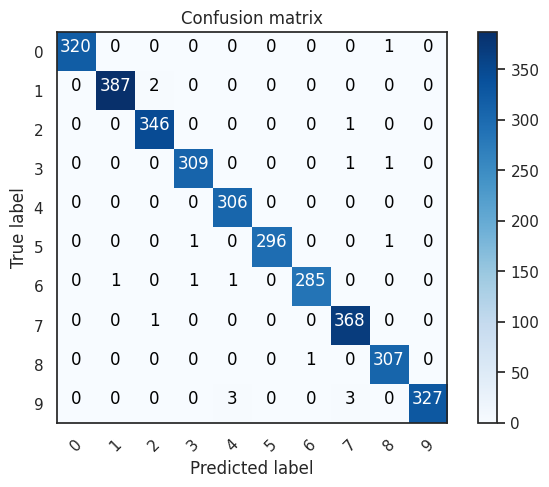

In [ ]:
# Look at confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

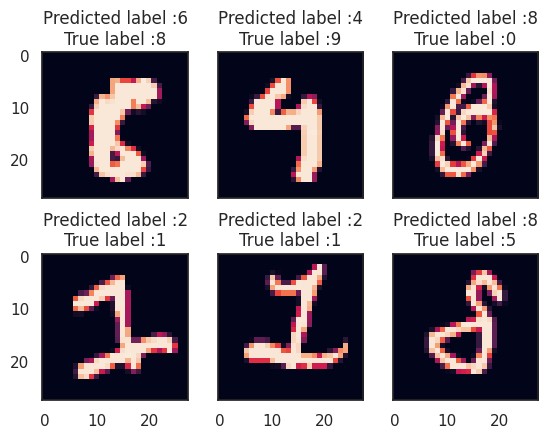

In [ ]:
# Display some error results

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

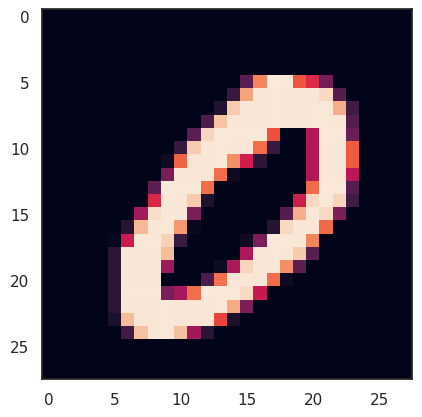

In [ ]:
plt.imshow(X_val[0])

In [ ]:
model.predict(np.reshape(X_val[0],[1,28,28,1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[9.9999976e-01, 2.5030931e-09, 6.6272065e-08, 3.0565858e-10,
        1.4063647e-09, 1.0360789e-09, 8.6133404e-08, 5.7396123e-09,
        5.0667484e-08, 1.0042855e-07]], dtype=float32)

In [ ]:
np.argmax(model.predict(np.reshape(X_val[0],[1,28,28,1])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


0

In [ ]:
def PredictImage(Image):
  print(np.argmax(model.predict(np.reshape(Image,[1,28,28,1]))))
  plt.imshow(Image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
0


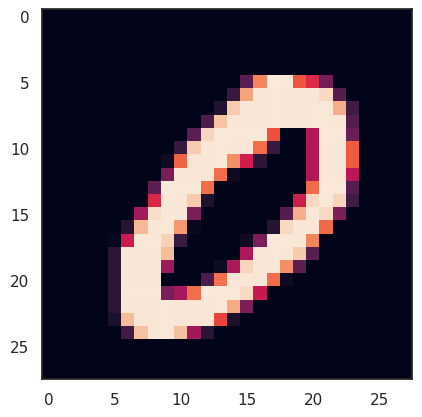

In [ ]:
PredictImage(X_val[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
9


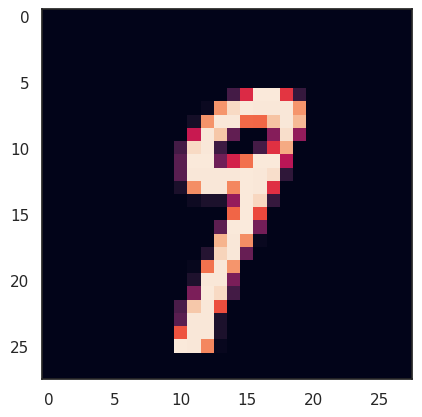

In [ ]:
PredictImage(X_val[np.random.randint(1000)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
7


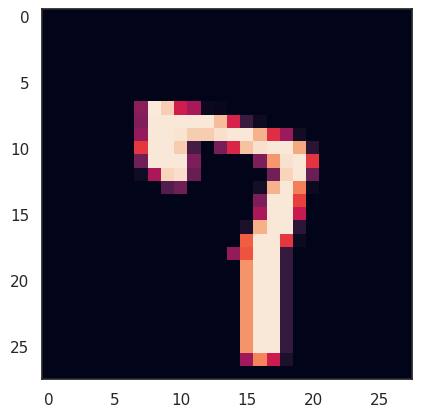

In [ ]:
PredictImage(X_val[np.random.randint(1000)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
5


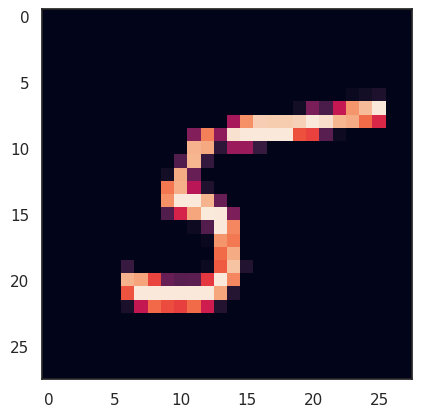

In [ ]:
PredictImage(X_val[np.random.randint(1000)])

In [ ]:
import cv2

In [ ]:
p = cv2.imread('/content/02.png',cv2.IMREAD_GRAYSCALE)
p.shape

(106, 110)

In [ ]:
p = cv2.resize(p,(28,28))
p.shape

(28, 28)

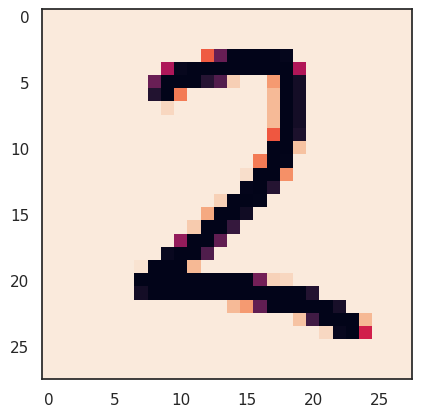

In [ ]:
plt.imshow(p)

In [ ]:
p = np.reshape(p,[28,28,1])
p.shape

(28, 28, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
2


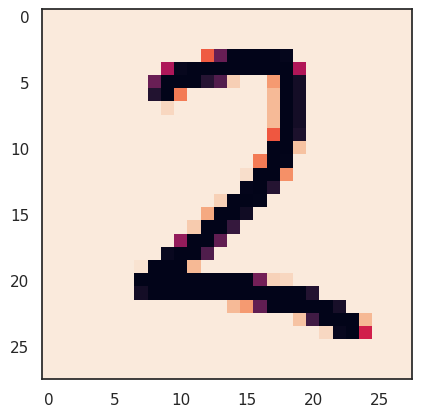

In [ ]:
PredictImage(p )